In [ ]:
%pip install z3-solver
%pip install numpy
%pip install matplotlib
from z3 import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random




## Final Project
For this project, the goal is to use the z3 solver to be able to solve some physical puzzles.  Namely, I want to look into the star battle puzzle and use python, alongside the solver to create a visual way to represent and solve this puzzle.  The goal of this project is to illustrate my process for solving these puzzles, and then implement it in code, narrating along the way the parts that I had an easy time dealing with, and some of the challenges that came about throughout the project.

#### Getting Started
The best way to work through this project is to hit 'Run All' right now, to prerun all of the cells, and then as you go through, rerun each cell as you get to it.

## Simple Version
I am going to attempt to use the z3 solver to model a simpler version of the star battle game.  Here are the rules that this game will follow:
1. We are in a 9x9 grid
2. Each row must have one star in it
3. Each column must have one star in it

In [11]:
# Define the size of the grid (We can run into some time complexity issues with larger grids, so for this early stage I am going to stick with small values for n)
n = 9

# Create our solver and a boolean variable for each cell in the grid
solver = Solver()
stars = [[Bool(f'star_{i}_{j}') for j in range(n)] for i in range(n)]

# Our two requirements for the puzzle so far: each row and each column must contain exactly one star
for i in range(n):
    solver.add(Sum([If(stars[i][j], 1, 0) for j in range(n)]) == 1)

for j in range(n):
    solver.add(Sum([If(stars[i][j], 1, 0) for i in range(n)]) == 1)

# Solve the puzzle and output the answer, using * for stars and . for empty cells (I will need to find a better way to visually represent this part in the future)
if solver.check() == sat:
    model = solver.model()
    solution = [[model.evaluate(stars[i][j]) for j in range(n)] for i in range(n)]
    for row in solution:
        print(' '.join(['*' if cell else '.' for cell in row]))
else:
    print("No solution found")

. . . . . . . * .
. . . . . * . . .
. . . * . . . . .
. . * . . . . . .
. * . . . . . . .
. . . . . . * . .
* . . . . . . . .
. . . . . . . . *
. . . . * . . . .


This first part was relatively simple, just warming up, making sure I remember all of the syntax and how to use the z3 solver to get a pretty trivial result (obviously we can have one star in each row/each column with just a diagonal matrix)

Now, let's up the challenge to account for 2 stars in each row and column.

In [12]:
n = 9
solver = Solver()
stars = [[Bool(f'star_{i}_{j}') for j in range(n)] for i in range(n)]
for i in range(n):
    solver.add(Sum([If(stars[i][j], 1, 0) for j in range(n)]) == 2)
    
for j in range(n):
    solver.add(Sum([If(stars[i][j], 1, 0) for i in range(n)]) == 2)

if solver.check() == sat:
    model = solver.model()
    solution = [[model.evaluate(stars[i][j]) for j in range(n)] for i in range(n)]
    for row in solution:
        print(' '.join(['*' if cell else '.' for cell in row]))
else:
    print("No solution found")
    

. . . . * * . . .
. * . . . . . * .
* . . * . . . . .
* . . . . . . . *
. . * . . . * . .
. . . . . * . * .
. * * . . . . . .
. . . * . . . . *
. . . . * . * . .


Not too much here, just changing our conditions to allow for 2 stars in each row/column.  It is becoming apparent that this part of the challenge is pretty simple, and will be pretty easy to generalize to any number of stars, with any size of grid by just modifying our n, and then adding in a variable to adjust the number of stars (k)

Let's generalize this situation, so that we can see how far we can push this puzzle

In [ ]:
n = 9
for k in range(1, n+1): # We now have a loop to iterate through all possible values of k from 1 to n, we will output a solution for each value of k
    solver = Solver()

    stars = [[Bool(f'star_{i}_{j}') for j in range(n)] for i in range(n)]
    for i in range(n):
        solver.add(Sum([If(stars[i][j], 1, 0) for j in range(n)]) == k) # Now, we want to make sure that each row contains exactly k stars(previously we hardcoded a single value)
        
    for j in range(n):
        solver.add(Sum([If(stars[i][j], 1, 0) for i in range(n)]) == k) # And each column contains exactly k stars

    if solver.check() == sat:
        model = solver.model()
        solution = [[model.evaluate(stars[i][j]) for j in range(n)] for i in range(n)]
        for row in solution:
            print(' '.join(['*' if cell else '.' for cell in row]))
        print()
    else:        print("No solution found")

. . . . * . . . .
. . . . . * . . .
. . . * . . . . .
. . * . . . . . .
* . . . . . . . .
. . . . . . . . *
. . . . . . . * .
. . . . . . * . .
. * . . . . . . .

. . . . . . . * *
. . . * . * . . .
. . . . . . * . *
* . . . * . . . .
. * . * . . . . .
. . * . * . . . .
. * * . . . . . .
. . . . . * * . .
* . . . . . . * .

* . . * . . . . *
. . * . . . * . *
. . . * . * . * .
. . * . * . . . *
. * . . . * * . .
. . * . * * . . .
* * . * . . . . .
. . . . * . * * .
* * . . . . . * .

* * . * . . * . .
. * . . * . * * .
. * * . . * . . *
. . * * . . . * *
. * . * * . * . .
* . * . . * * . .
* . . . . * . * *
. . * * * . . . *
* . . . * * . * .

* * . * * . . . *
* . . * * . . * *
. * . * * * . * .
. . * * . * * * .
* . * * . * * . .
. * . . * * . * *
* . * . . . * * *
* * * . . * * . .
. * * . * . * . *

. . * * . * * * *
* . . * * * * . *
* * . * * * * . .
. * * * . * * . *
* * . * * . . * *
. . * * . * * * *
* * * . * . * * .
* * * . * . . * *
* * * . * * . * .

* * * * . * * * .
* * 

This result encapsulates all that we have proven so far, that we can take any nxn grid and find a satisfying assignment of stars that align with our rule.  Note that we can do this with symmetrical grids of all sizes, but as the input gets large we can be left waiting forever for the results to populate.

Now, this is more of a programming issue, but the visualization of our grids can get confusing at this stage, as the asterisks and dots don't give us a good way to move forward with the rest of the conditions for star battle.  Furthermore, it just makes more sense to have a more visually appealing grid for demonstration purposes, and to make sure that our examples match up to the puzzles that we are trying to solve from https://www.gmpuzzles.com/blog/category/objectplacement/star-battle/ 

In [14]:
# Create a visual representation of the grid with our row/column solution using matplotlib and numpy
def plot_grid(solution):
    if not solution:
        print("No solution found")
        return
    grid = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if is_true(solution[i][j]):
                grid[i][j] = 1

    plt.figure(figsize=(n, n))
    plt.xticks(np.arange(0.5, n, 1), np.arange(1, n+1, 1))
    plt.yticks(np.arange(0.5, n, 1), np.arange(1, n+1, 1))
    plt.grid(which='minor', color='black', linestyle='-', linewidth=.5)
    plt.grid(which='major', color='black', linestyle='-', linewidth=.001)
    plt.gca().set_xticks(np.arange(0, n, 1), minor=True)
    plt.gca().set_yticks(np.arange(0, n, 1), minor=True)

    for i in range(n):
        for j in range(n):
            if is_true(solution[i][j]):
                plt.text(j + 0.5, i + 0.5, '*', ha='center', va='center', color='black', fontsize=30)

    plt.xlim(0, n)
    plt.ylim(0, n)
    plt.gca().invert_yaxis()
    plt.show()

Now we have a function that we can use to print our grid in a more visually appealing fashion, that takes a solution as input, and outputs a grid with stars in the boxes associated with our model.

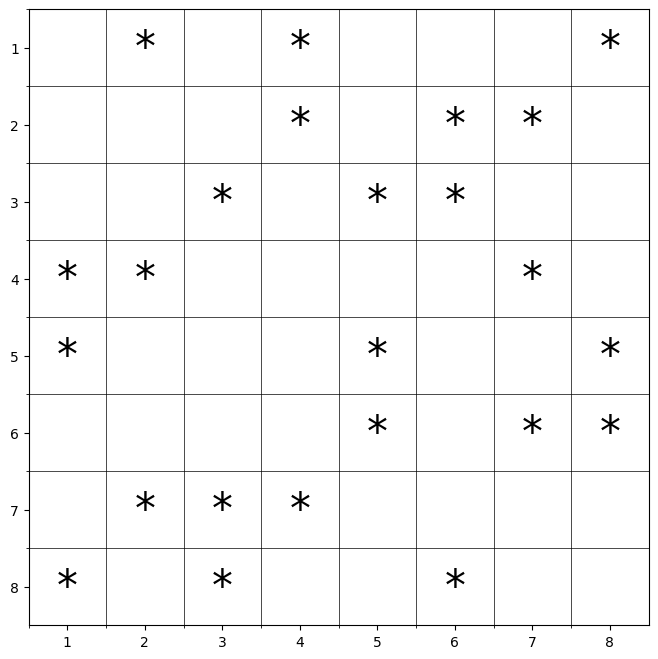

. * . * . . . *
. . . * . * * .
. . * . * * . .
* * . . . . * .
* . . . * . . *
. . . . * . * *
. * * * . . . .
* . * . . * . .


In [15]:
# Here we assign n and k, feel free to play around with different values
n = 8
k = 3
solver = Solver()

stars = [[Bool(f'star_{i}_{j}') for j in range(n)] for i in range(n)]
for i in range(n):
    solver.add(Sum([If(stars[i][j], 1, 0) for j in range(n)]) == k)
    
for j in range(n):
    solver.add(Sum([If(stars[i][j], 1, 0) for i in range(n)]) == k)

if solver.check() == sat:
    model = solver.model()
    solution = [[model.evaluate(stars[i][j]) for j in range(n)] for i in range(n)]
    plot_grid(solution)
    for row in solution:
        print(' '.join(['*' if cell else '.' for cell in row]))
else:
    solution = None       
    print("No solution found")

Here are the two models side by side, one generated using asterisks and dots, and the other in matplotlib.  I think that it is pretty clear why this was a necessary change, and worth the extra programming headache, since our new grid looks an awful lot more like a puzzle board, and allows us to play around more with these star battle set ups.

## Onto the actual puzzle

#### Star Battle
Star battle is a grid game where given an n x n grid and k stars, it is our goal to assemble the stars in such a way that there is k stars in each row, k stars in each column, and k stars in each group.  A group is a section of the grid that is continuous, and seperated from other groups with a border (in our model we will be color coding groups for convenience)

Now, to really implement the idea of a star battle game, we need to introduce an idea of 'groups'.  This will be represented by a series of coordinates that are grouped together.  The idea is that each section should also contain our number of stars... this will be difficult to display programmatically.  The best approach that I have in mind is to store a list of the coordinates of the 'groups' that our star battle puzzle board is seperated into, and then use our z3 solver to create a model where there are k stars in each row, k stars in each column, and k stars in each group.

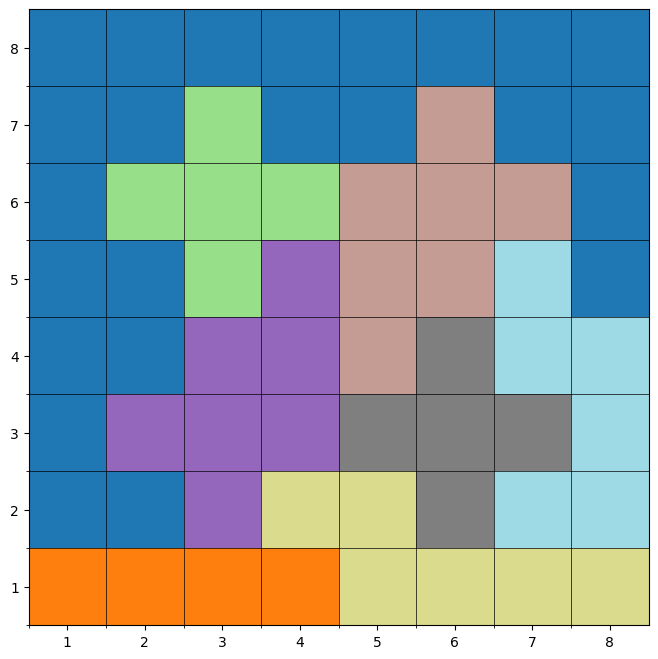

In [ ]:
# This is just a simple function to parse our coordinates from a string into a list of tuples, eventually we will not need to do this manually
def parse_coords(text):
    groups = text.strip().split('}\n\n{')
    groups = [group.replace('{', '').replace('}', '').split('\n') for group in groups]
    parsed_groups = []
    for group in groups:
        coords = [tuple(map(int, coord.split(','))) for coord in group]
        parsed_groups.append(coords)
    return parsed_groups


# These are the coordinates for the groups in this specific puzzle, gotten from our website: https://www.gmpuzzles.com/blog/category/objectplacement/star-battle/ 
# Each group is defined by a set of coordinates in the brackets
coords_text = """
{1,1
1,2
1,3
1,4
1,5
1,6
1,7
2,1
2,2
2,4
2,5
2,7
3,1
4,1
4,2
5,1
5,2
6,1
7,1
7,2
8,1
8,2
8,3
8,4}

{1,8
2,8
3,8
4,8}

{3,2
3,3
4,3
3,4
2,3
5,3}

{2,6
3,5
3,6
3,7
4,4
4,5
4,6}

{5,3
5,4
5,5
6,2
6,3
6,4
7,3}

{5,6
6,5
6,6
6,7
7,6}

{4,7
5,7
5,8
6,8
7,8
8,8}

{7,4
7,5
8,5
8,6
8,7
7,7}
"""
coords_groups = parse_coords(coords_text)

# This is a function that uses matplotlib to plot the grid with the groups colored differently (it does not solve the puzzle, which is what we will do next)
n = 8
def plot_colored_grid(coords_groups, n):
    fig, ax = plt.subplots(figsize=(n, n))
    ax.set_xticks(np.arange(0.5, n, 1))
    ax.set_yticks(np.arange(0.5, n, 1))
    ax.set_xticklabels(np.arange(1, n+1, 1))
    ax.set_yticklabels(np.arange(1, n+1, 1))
    ax.grid(which='minor', color='black', linestyle='-', linewidth=.5)
    ax.grid(which='major', color='black', linestyle='-', linewidth=.001)
    ax.set_xticks(np.arange(0, n, 1), minor=True)
    ax.set_yticks(np.arange(0, n, 1), minor=True)
    ax.invert_yaxis()

    colors = plt.get_cmap('tab20', len(coords_groups)) # This is getting deprecated, but it works for now

    for group_idx, group in enumerate(coords_groups):
        for (x, y) in group:
            rect = patches.Rectangle((x-1, n - y), 1, 1, linewidth=1, edgecolor='none', facecolor=colors(group_idx))
            ax.add_patch(rect)
    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    plt.show()

# Call our function to "Build" the puzzle
plot_colored_grid(coords_groups, n)

Success, we now have a board on which we can attempt to solve our puzzle!

Note about constructing these puzzles: our function allows us to make the grid as big as we want by adjusting the size of n, but since we are constructing our groups manually using exact coordinates, it is very important that we use the correct n for our specific puzzle, otherwise we can be left with blanks on the grid.

Now, for the really difficult part here: we want to be able to solve this puzzle, and display our answer on the grid.



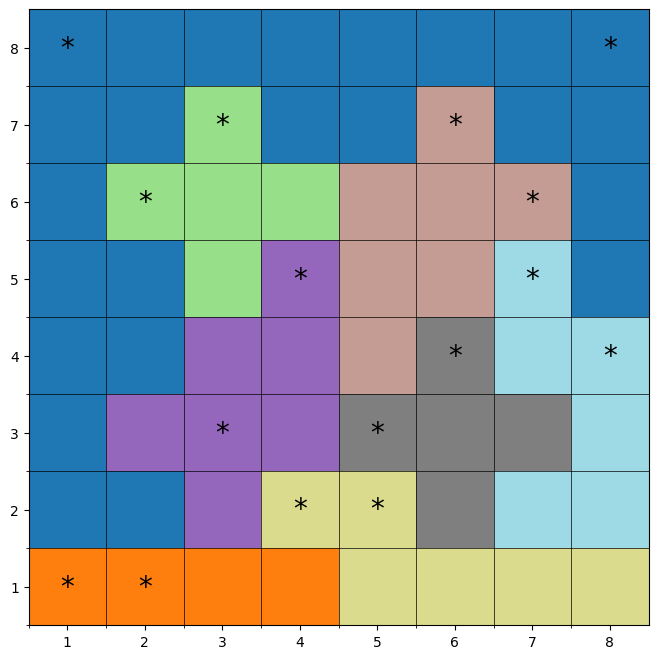

In [23]:
# Same coordinates as before, just reinitialized to make it easier to run this cell independently
coords_text = """
{1,1
1,2
1,3
1,4
1,5
1,6
1,7
2,1
2,2
2,4
2,5
2,7
3,1
4,1
4,2
5,1
5,2
6,1
7,1
7,2
8,1
8,2
8,3
8,4}

{1,8
2,8
3,8
4,8}

{3,2
3,3
4,3
3,4
2,3
5,3}

{2,6
3,5
3,6
3,7
4,4
4,5
4,6}

{5,3
5,4
5,5
6,2
6,3
6,4
7,3}

{5,6
6,5
6,6
6,7
7,6}

{4,7
5,7
5,8
6,8
7,8
8,8}

{7,4
7,5
8,5
8,6
8,7
7,7}
"""
coords_groups = parse_coords(coords_text)

# Here we add a new parameter and alter our plotting function to include the solution, and output stars in the cells that are true
def plot_solution_and_colored_grid(solution, coords_groups, n):
    fig, ax = plt.subplots(figsize=(n, n))
    ax.set_xticks(np.arange(0.5, n, 1))
    ax.set_yticks(np.arange(0.5, n, 1))
    ax.set_xticklabels(np.arange(1, n+1, 1))
    ax.set_yticklabels(np.arange(1, n+1, 1))
    ax.grid(which='minor', color='black', linestyle='-', linewidth=0.5)
    ax.grid(which='major', color='black', linestyle='-', linewidth=0.001)
    ax.set_xticks(np.arange(0, n, 1), minor=True)
    ax.set_yticks(np.arange(0, n, 1), minor=True)
    ax.invert_yaxis()

    colors = plt.get_cmap('tab20', len(coords_groups))

    for group_idx, group in enumerate(coords_groups):
        for (x, y) in group:
            rect = patches.Rectangle((x - 1, n - y), 1, 1, linewidth=1, edgecolor='none', facecolor=colors(group_idx))
            ax.add_patch(rect)

    for i in range(n):
        for j in range(n):
            if solution[i][j]:
                ax.text(i + 0.5, n - j - 0.5, '*', ha='center', va='center', color='black', fontsize=20)

    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    plt.show()

# Here is an example usage of plotting a solution to this specific puzzle.  
# Feel free to play around with different values of k, but right now we cannot alter n, since we have hardcoded the coordinates
k = 2
n = 8
solver = Solver()
stars = [[Bool(f'star_{i}_{j}') for j in range(n)] for i in range(n)]

for i in range(n):
    solver.add(Sum([If(stars[i][j], 1, 0) for j in range(n)]) == k)

for j in range(n):
    solver.add(Sum([If(stars[i][j], 1, 0) for i in range(n)]) == k)

for group_idx, group in enumerate(coords_groups):
    group_cells = [stars[x-1][y-1] for (x, y) in group]
    solver.add(Sum([If(cell, 1, 0) for cell in group_cells]) == k)

if solver.check() == sat:
    model = solver.model()
    solution = [[model.evaluate(stars[i][j]) for j in range(n)] for i in range(n)]
    plot_solution_and_colored_grid(solution, coords_groups, n)
else:
    print("No solution found")

Now, we have set up our solver to respect groups, and put our solution onto a usefully colored grid.  We can adjust our value of k to see which puzzles are solvable for different numbers of stars, and play around with the limits of these puzzles.

In this next cell, I played around with trying to generate my own boards.  I wanted an automated way to make these 'groups' of coordinates that I have been using, which will allow users to generate their own board, and then also check how many solutions there are.

This part was a significant struggle for me... I intially started with just the logic for assigning new cells, but quickly realized that this often left cells unassigned to groups.  I also did not initially use n as the number of groups, but further research into the build of these puzzles caused me to realize that if we do not have the same # of groups as we do rows/columns, the puzzle will be unsolvable (I attempted to iterate through many different versions of these boards, checking for a solution on each one, but the program ended up just running forever).  That is the version directly below this cell (run at your own risk, I have never seen it terminate... it will just continuously generate new boards, attempt to solve them, fail, and then continue)

Feel free to run it for a few seconds, and then scroll down to look at all of the boards it generated.. and then kill the run.

In [28]:
#comment out the next line to allow you to run this cell, this exists to prevent the Run All command from running this cell(it will run indefinitely)
%%script false --no-raise-error

def generate_continuous_groups_fail(n, num_groups, min_group_size, max_group_size):
    grid = np.zeros((n, n), dtype=bool)
    groups = []
    def is_valid(x, y):
        return 0 <= x < n and 0 <= y < n and not grid[x, y]

    def get_neighbors(x, y):
        neighbors = []
        if is_valid(x + 1, y):
            neighbors.append((x + 1, y))
        if is_valid(x - 1, y):
            neighbors.append((x - 1, y))
        if is_valid(x, y + 1):
            neighbors.append((x, y + 1))
        if is_valid(x, y - 1):
            neighbors.append((x, y - 1))
        return neighbors

    remaining_cells = [(i, j) for i in range(n) for j in range(n)]
    random.shuffle(remaining_cells)

    while remaining_cells:
        group_size = random.randint(min_group_size, max_group_size)
        start_x, start_y = remaining_cells.pop()
        while not is_valid(start_x, start_y):
            start_x, start_y = remaining_cells.pop()

        group = [(start_x + 1, start_y + 1)]
        grid[start_x, start_y] = True

        while len(group) < group_size and remaining_cells:
            x, y = random.choice(group)
            neighbors = get_neighbors(x - 1, y - 1)
            if not neighbors:
                break
            new_x, new_y = random.choice(neighbors)
            group.append((new_x + 1, new_y + 1))
            grid[new_x, new_y] = True
            remaining_cells.remove((new_x, new_y))

        groups.append(group)

    return groups

n = 8
num_groups = 8
min_group_size = 3
max_group_size = 15
coords_groups = generate_continuous_groups_fail(n, num_groups, min_group_size, max_group_size)

solver = Solver()
while True:
    coords_groups = generate_continuous_groups_fail(n, num_groups, min_group_size, max_group_size)
    plot_colored_grid(coords_groups, n)
    stars = [[Bool(f'star_{i}_{j}') for j in range(n)] for i in range(n)]
    for i in range(n):
        solver.add(Sum([If(stars[i][j], 1, 0) for j in range(n)]) == 2)
    for j in range(n):
        solver.add(Sum([If(stars[i][j], 1, 0) for i in range(n)]) == 2)
    for group_idx, group in enumerate(coords_groups):
        group_cells = [stars[x-1][y-1] for (x, y) in group]
        solver.add(Sum([If(cell, 1, 0) for cell in group_cells]) == 2)
    if solver.check() == sat:
        model = solver.model()
        solution = [[model.evaluate(stars[i][j]) for j in range(n)] for i in range(n)]
        plot_solution_and_colored_grid(solution, coords_groups, n)
        break
    else:
        print("No solution found")
        solver.reset()
        continue
        
    

UsageError: Line magic function `%%script` not found.


Now here is the version that actually works... Each run generates a new group of coordinates that are 'groups' in a grid of size n.

In [29]:

def generate_continuous_groups(n):
    total_cells = n * n
    num_groups = n  
    grid = np.zeros((n, n), dtype=int)
    groups = []

    base_group_size = total_cells // num_groups
    extra_cells = total_cells % num_groups
    group_sizes = [base_group_size] * num_groups

    for i in range(extra_cells):
        group_sizes[i] += 1

    unassigned_cells = [(i, j) for i in range(n) for j in range(n)]
    random.shuffle(unassigned_cells)
    group_id = 1

    for size in group_sizes:
        while unassigned_cells:
            start_cell = unassigned_cells.pop()
            if grid[start_cell] == 0:
                break
        else:
            break

        group = [start_cell]
        grid[start_cell] = group_id

        queue = [start_cell]
        while len(group) < size and queue:
            cell = queue.pop(0)
            x, y = cell
            neighbors = []
            if x + 1 < n and grid[x + 1, y] == 0:
                neighbors.append((x + 1, y))
            if x - 1 >= 0 and grid[x - 1, y] == 0:
                neighbors.append((x - 1, y))
            if y + 1 < n and grid[x, y + 1] == 0:
                neighbors.append((x, y + 1))
            if y - 1 >= 0 and grid[x, y - 1] == 0:
                neighbors.append((x, y - 1))
            random.shuffle(neighbors)
            for neighbor in neighbors:
                if len(group) >= size:
                    break
                if neighbor in unassigned_cells:
                    unassigned_cells.remove(neighbor)
                grid[neighbor] = group_id
                group.append(neighbor)
                queue.append(neighbor)

        groups.append(group)
        group_id += 1

    while unassigned_cells:
        cell = unassigned_cells.pop()
        x, y = cell
        neighbors = []
        if x + 1 < n and grid[x + 1, y] != 0:
            neighbors.append((x + 1, y))
        if x - 1 >= 0 and grid[x - 1, y] != 0:
            neighbors.append((x - 1, y))
        if y + 1 < n and grid[x, y + 1] != 0:
            neighbors.append((x, y + 1))
        if y - 1 >= 0 and grid[x, y - 1] != 0:
            neighbors.append((x, y - 1))
        if neighbors:
            neighbor = random.choice(neighbors)
            group_id = grid[neighbor]
            grid[cell] = group_id
            groups[group_id - 1].append(cell)
        else:
            random_group = random.choice(groups)
            random_group.append(cell)
            grid[cell] = grid[random_group[0]]

    group_dict = {}
    for x in range(n):
        for y in range(n):
            gid = grid[x, y]
            if gid in group_dict:
                group_dict[gid].append((x + 1, y + 1))  # Adjust to 1-based indexing
            else:
                group_dict[gid] = [(x + 1, y + 1)]

    coords_groups = list(group_dict.values())

    return coords_groups


## Final Result

Below is a consolidation of the functions that we have generated, all put together in one cell where you can generate a board with random groups, specifying your own size using the n variable, and then you can check the solutions after, to see if there exists solutions for k = 1...n

Once again, feel free to play around with different values for n, and try to see which values of k you can find solutions for, and then use the results of the solver to check your answers.

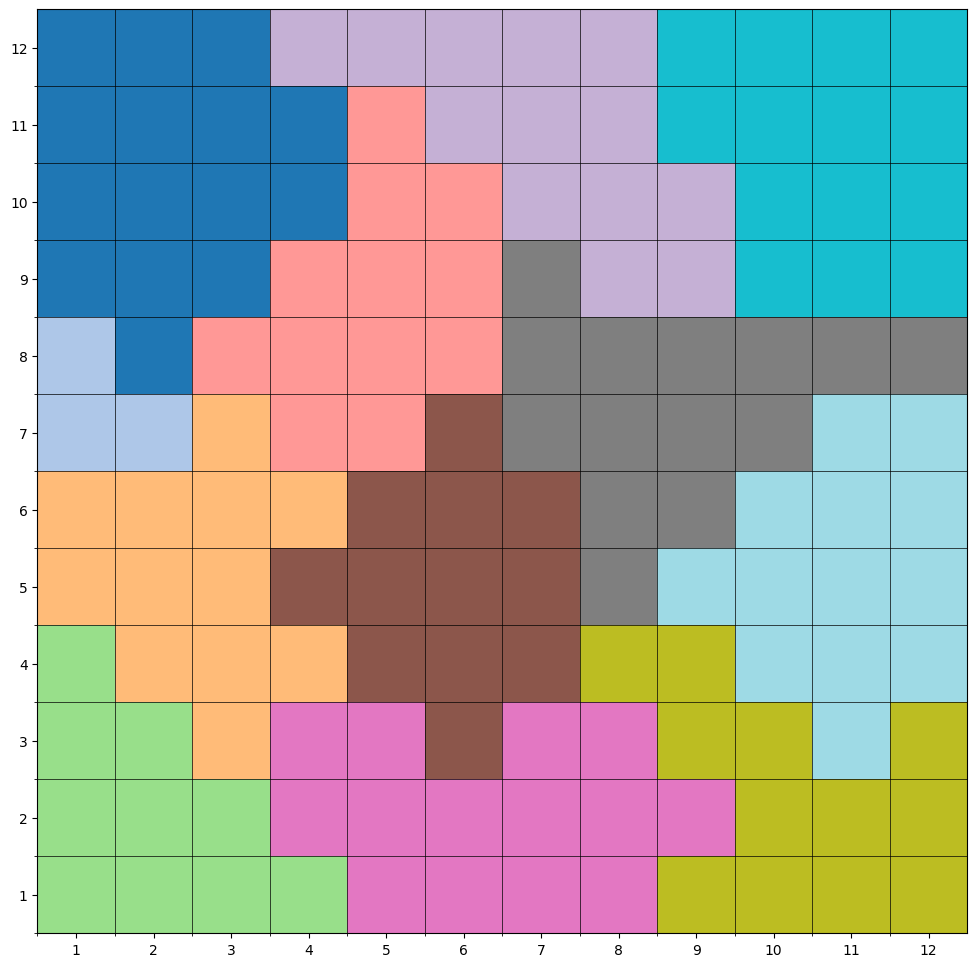

Stars per row/column/group: 1


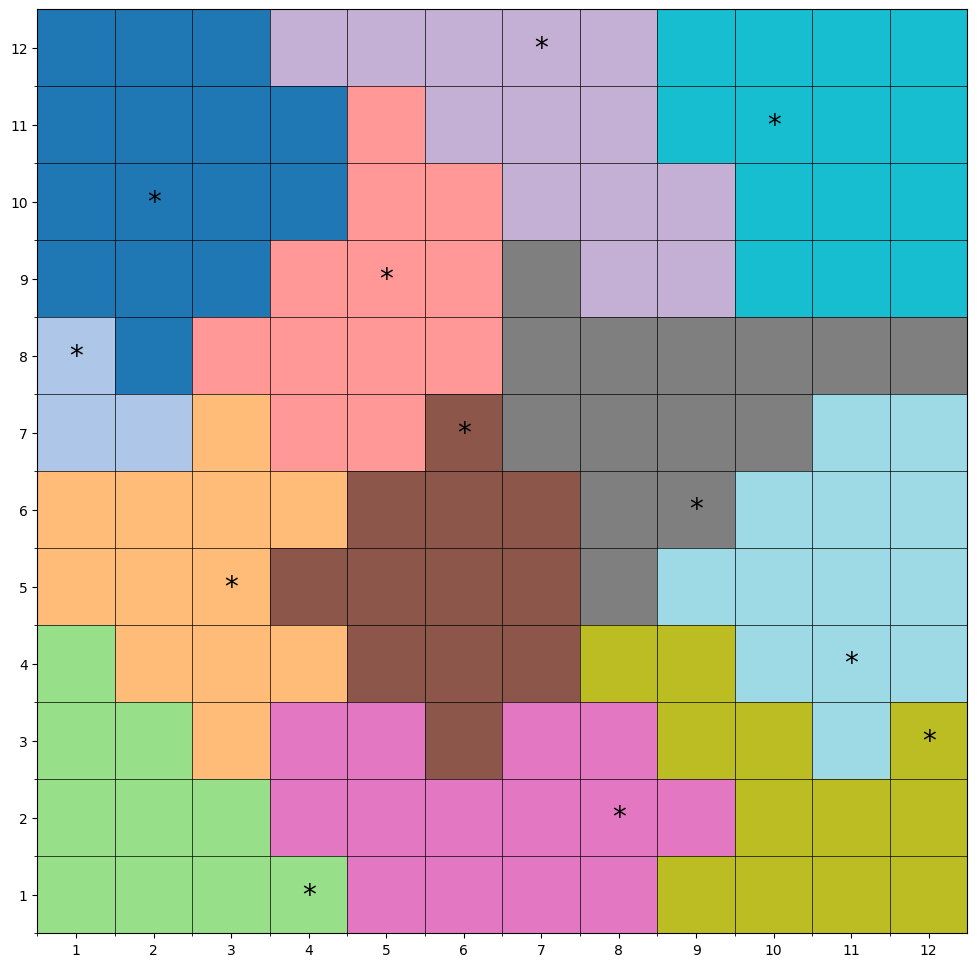

Stars per row/column/group: 2
No solution found
Stars per row/column/group: 3


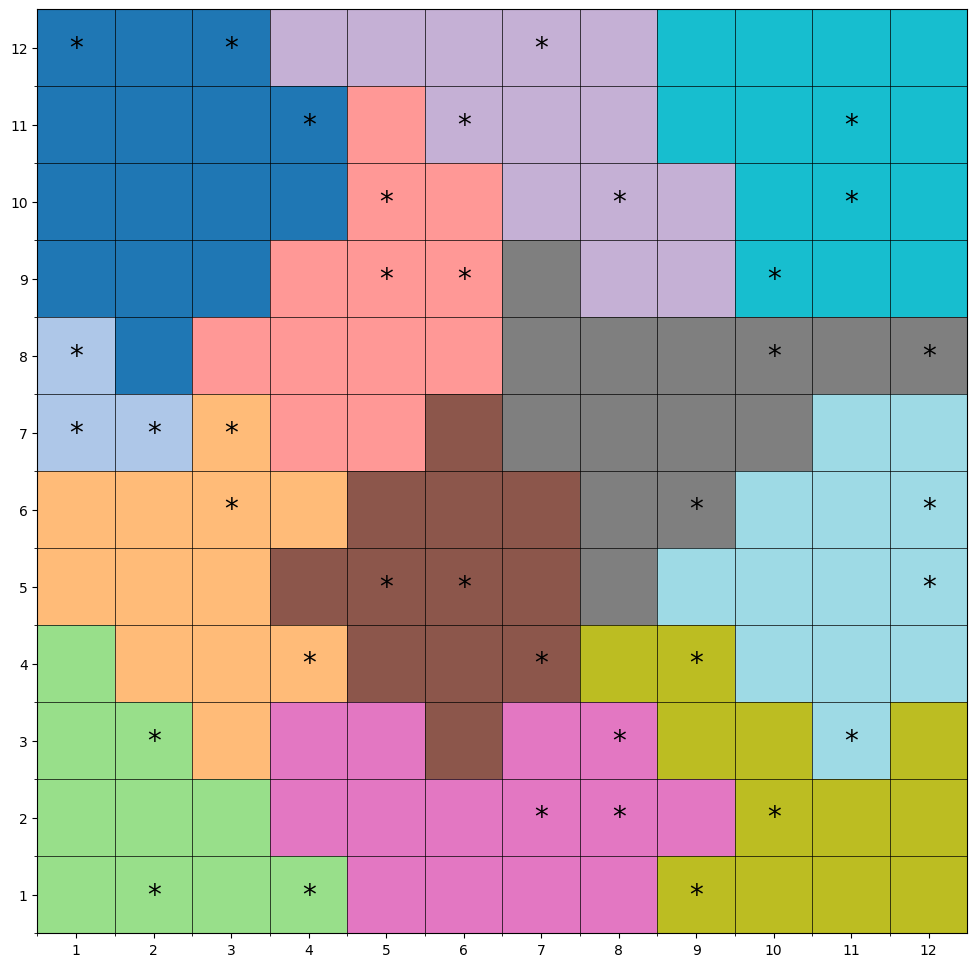

Stars per row/column/group: 4
No solution found
Stars per row/column/group: 5
No solution found
Stars per row/column/group: 6
No solution found
Stars per row/column/group: 7
No solution found
Stars per row/column/group: 8
No solution found
Stars per row/column/group: 9
No solution found
Stars per row/column/group: 10
No solution found
Stars per row/column/group: 11
No solution found
Stars per row/column/group: 12
No solution found


In [ ]:
solver = Solver()
n = 12
coords_groups = generate_continuous_groups(n)
plot_colored_grid(coords_groups, n)
for k in range(1, n +1): # We now have a loop to iterate through all possible values of k from 1 to n, we will output a solution for each value of k, or output that no solution was found
    print(f"Stars per row/column/group: {k}")
    stars = [[Bool(f'star_{i}_{j}') for j in range(n)] for i in range(n)]

    for i in range(n):
        solver.add(Sum([If(stars[i][j], 1, 0) for j in range(n)]) == k)

    for j in range(n):
        solver.add(Sum([If(stars[i][j], 1, 0) for i in range(n)]) == k)

    for group_idx, group in enumerate(coords_groups):
        group_cells = [stars[x-1][y-1] for (x, y) in group]
        solver.add(Sum([If(cell, 1, 0) for cell in group_cells]) == k)

    if solver.check() == sat:
        model = solver.model()
        solution = [[model.evaluate(stars[i][j]) for j in range(n)] for i in range(n)]
        plot_solution_and_colored_grid(solution, coords_groups, n)
    else:
        print("No solution found")
        solver.reset()
